## Rachel Tekchandani

## DATA 4319 Machine Learning

----

## Decision Trees

![](tree.jpg)

A decision tree is a recursive way of building a tree-like structure to decide whether a set of features meet the criteria for a given label.

----

Is it possible to classify the origin of a car based on its MPG and Weight?  Some car manufacturers make cars lighter and more efficient.  These features may be used to predict where a car came from.  We will use the mpg and weight as features and the origin as the target and train a tree classifier.

In [1]:
# Bring in the MPG data
import pandas as pd
from numpy import array
file1 = 'https://raw.githubusercontent.com/prince381/car_mpg_predict/master/cars1.csv'
file2 = 'https://raw.githubusercontent.com/prince381/car_mpg_predict/master/cars2.csv'

cars1 = pd.read_csv(file1)   # read in the first data file
cars2 = pd.read_csv(file2)   # read in the second data file

In [2]:
# we have other columns named unamed which contains only NaN values
# so we drop them.
cars1.drop(cars1.columns[9:],axis=1,inplace=True) 

# concatenate the two data
cars = pd.concat([cars1,cars2])
cars.head()  # print the first five rows of the data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


In [3]:
features = cars[["mpg","weight"]]
features = array(features)

In [4]:
labels = array(cars["origin"])

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


car_clf = DecisionTreeClassifier(max_depth=2)
car_clf.fit(features,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[1] <= 2562.5\nentropy = 0.538\nsamples = 398\nvalue = [249, 70, 79]'),
 Text(83.7, 108.72, 'X[0] <= 30.95\nentropy = 0.653\nsamples = 156\nvalue = [43, 46, 67]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.665\nsamples = 83\nvalue = [28, 30, 25]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.579\nsamples = 73\nvalue = [15, 16, 42]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 3274.0\nentropy = 0.263\nsamples = 242\nvalue = [206, 24, 12]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.474\nsamples = 106\nvalue = [73, 21, 12]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.043\nsamples = 136\nvalue = [133, 3, 0]')]

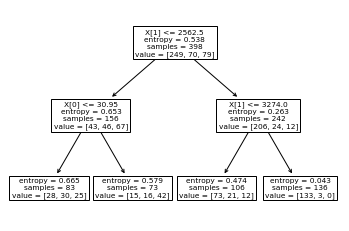

In [8]:
%matplotlib inline
tree.plot_tree(car_clf)

---

The tree above is a visualization of the classifier in a tree format.  Using the same classifier, we can make predictions and then see if the prediction is accurate based on the known values from the labels list.

---

In [14]:
def predictAndCompare(x):
    prediction = car_clf.predict([features[x]])[0]
    print(f"The predicted origin for {x} is {prediction}. ")
    correct = labels[22]
    print(f"The correct label for {x} is {correct}.")
    if correct == prediction:
        print("In This case, the prediction was correct")
    else:
        print("In this case, the prediction was incorrect.")
    print("-----------------------------------------------")

In [15]:
testThese = [4,8,16,32]
for this in testThese:
    predictAndCompare(this)

The predicted origin for 4 is 1. 
The correct label for 4 is 2.
In this case, the prediction was incorrect.
-----------------------------------------------
The predicted origin for 8 is 1. 
The correct label for 8 is 2.
In this case, the prediction was incorrect.
-----------------------------------------------
The predicted origin for 16 is 1. 
The correct label for 16 is 2.
In this case, the prediction was incorrect.
-----------------------------------------------
The predicted origin for 32 is 2. 
The correct label for 32 is 2.
In This case, the prediction was correct
-----------------------------------------------


---

The classifier appears to have some trouble being able to correctly classify the origin of a car using only the mpg and weight. To improve the performance, additional features may be added or we may need additional examples for training.

This notebook did successfully show the process of creating a decision tree using the sci-kit learn package. This tree was visualized and then used to make a prediction.